### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [3]:
# your code and solutions
import pandas as pd

df = pd.read_csv('The E-commerce Dataset.csv')

print("Len of data = ", len(df))
print("No. of null = ")
print(df.isnull().sum())

df = df.dropna(subset = ['gender', 'rating', 'helpfulness'])
df = df[df['review'] != 'none']

print("Len of data (after) = ", len(df))
print("No. of null (after) = ")
print(df.isnull().sum())

print("Cleansed DF = ")
print(df)

Len of data =  20000
No. of null = 
userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64
Len of data (after) =  19916
No. of null (after) = 
userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64
Cleansed DF = 
       userId  timestamp                                    review  \
0        4051      12807                 Great job for what it is!   
1        4052     122899               Free Access Worth your Time   
2          33      12700             AOL..I love you!!!!!!!!!!!!     
3          33      21000              EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300           Blair Witch...Oh Come On.......   
...       ...        ...                                       ...

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [10]:
# your code and solutions
import pandas as pd

df = pd.read_csv('The E-commerce Dataset.csv')

unique_Users = df['userId'].nunique()
unique_Reviews = df['review'].nunique()
unique_Items = df['item'].nunique()
unique_Categories = df['category'].nunique()

print("No. of unique users:", unique_Users)
print("No. of of unique reviews:", unique_Reviews)
print("No. of of unique items:", unique_Items)
print("No. of of unique categories:", unique_Categories)

No. of unique users: 8580
No. of of unique reviews: 19524
No. of of unique items: 89
No. of of unique categories: 9


In [11]:
rating_stats = df['rating'].describe()

print("DS for rating = ")
print(rating_stats)

DS for rating = 
count    19983.000000
mean         3.701847
std          1.404619
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


In [21]:
gender_Group = df.groupby('gender')['item_id']

mean_Items = gender_Group.count().mean()
std_Items = gender_Group.count().std()
min_Items = gender_Group.count().min()
max_Items = gender_Group.count().max()

print("Mean = ", mean_Items)
print("STD = ", std_Items)
print("Min = ", min_Items)
print("Max = ", max_Items)

Mean =  9986.5
STD =  236.88077169749343
Min =  9819
Max =  10154


In [29]:
item_Rating_Count = df.groupby('item')['review'].count()
rating_Stats = item_Rating_Count.describe()

print("Mean = ", rating_Stats['mean'])
print("STD = ", rating_Stats['std'])
print("Minimum = ", rating_Stats['min'])
print("Maximum = ", rating_Stats['max'])

Mean =  224.7191011235955
STD =  116.92373084855991
Minimum =  140.0
Maximum =  944.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

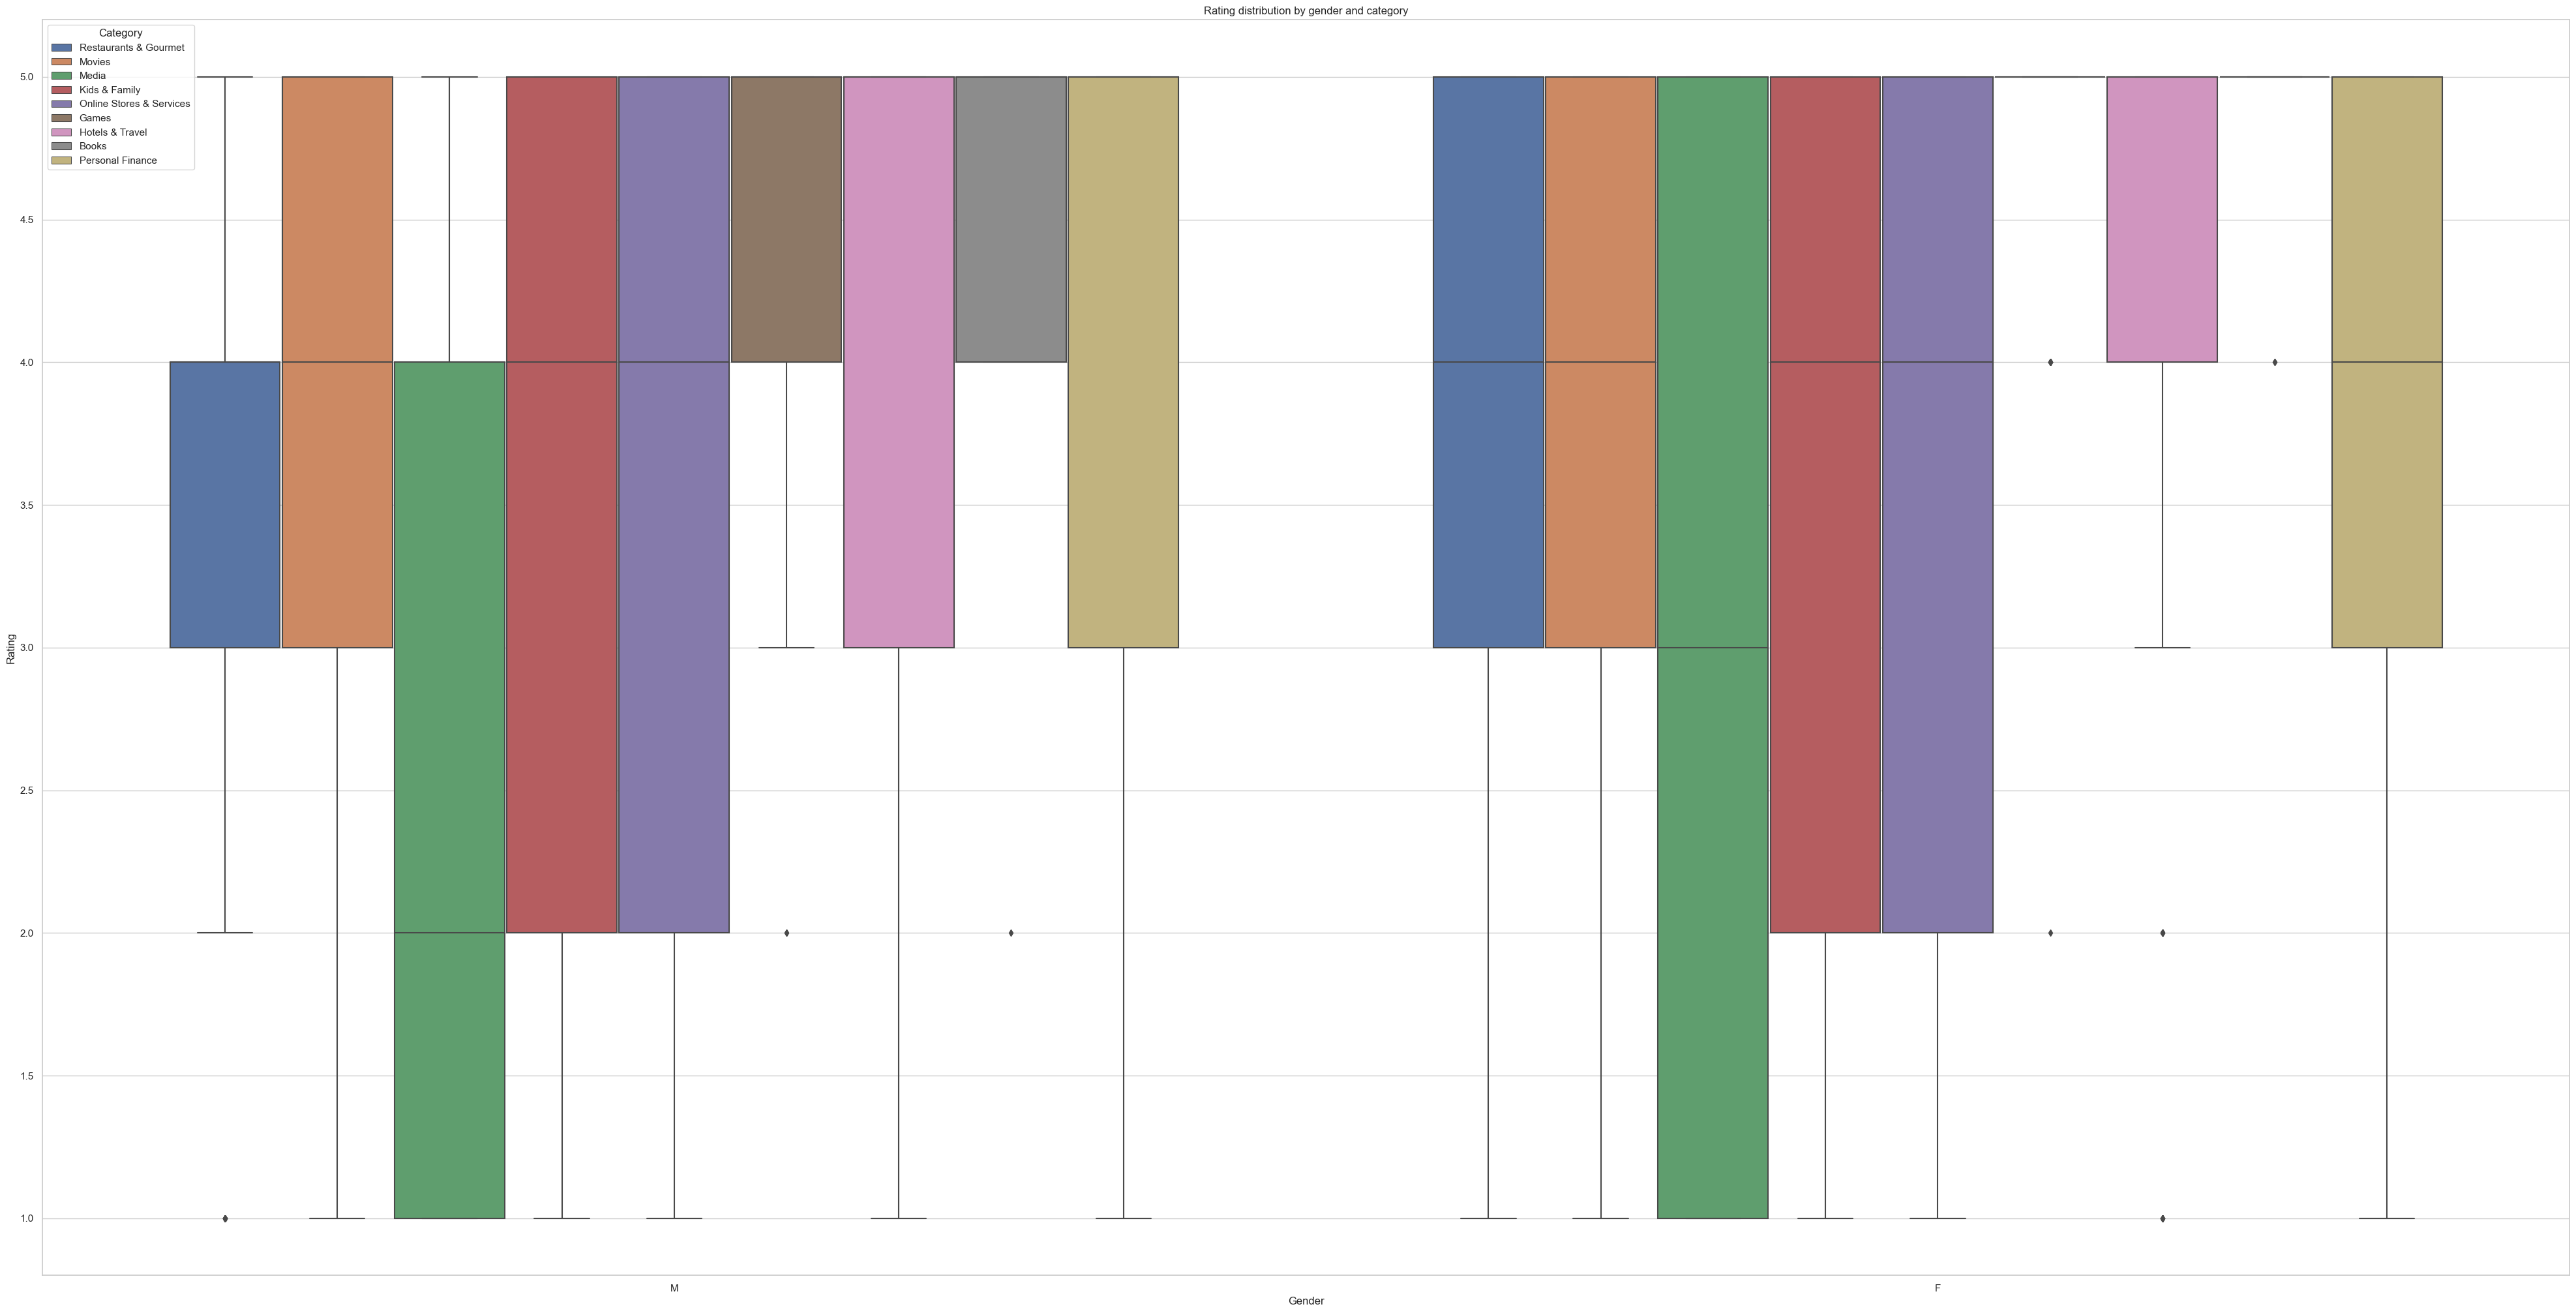

In [51]:
# your code and solutions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

plt.figure(figsize = (50, 25))
sns.boxplot(data = df, x = 'gender', y = 'rating', hue = 'category')
plt.title('Rating distribution by gender and category')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.legend(title = 'Category')

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [53]:
# your code and solutions
df = df[df['helpfulness'] > 2]

user_Item_Count = df['userId'].value_counts()
outlier_User = user_Item_Count[user_Item_Count < 7].index
df = df[~df['userId'].isin(outlier_User)]
item_Rating_Count = df['item'].value_counts()
outlier_Item = item_Rating_Count[item_Rating_Count < 11].index
df = df[~df['item'].isin(outlier_Item)]
print("Len of Data after cleansing outliers = ", len(df))

Len of Data after cleansing outliers =  2520
